In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip '/content/drive/MyDrive/datasetbd.zip'

Streaming output truncated to the last 5000 lines.
  inflating: datasetbd/train/marine animals/Turtle_Tortoise/Turtle_Tortoise (360).jpg  
  inflating: datasetbd/train/marine animals/Turtle_Tortoise/Turtle_Tortoise (361).jpg  
  inflating: datasetbd/train/marine animals/Turtle_Tortoise/Turtle_Tortoise (362).jpg  
  inflating: datasetbd/train/marine animals/Turtle_Tortoise/Turtle_Tortoise (363).jpg  
  inflating: datasetbd/train/marine animals/Turtle_Tortoise/Turtle_Tortoise (364).jpg  
  inflating: datasetbd/train/marine animals/Turtle_Tortoise/Turtle_Tortoise (365).jpg  
  inflating: datasetbd/train/marine animals/Turtle_Tortoise/Turtle_Tortoise (366).jpg  
  inflating: datasetbd/train/marine animals/Turtle_Tortoise/Turtle_Tortoise (367).jpg  
  inflating: datasetbd/train/marine animals/Turtle_Tortoise/Turtle_Tortoise (368).jpg  
  inflating: datasetbd/train/marine animals/Turtle_Tortoise/Turtle_Tortoise (369).jpg  
  inflating: datasetbd/train/marine animals/Turtle_Tortoise/Turtle_To

In [ ]:
#import required lib
import numpy as np
import tensorflow as tf
import keras
import keras.backend as K
from keras.optimizers import SGD, Adam, Adagrad, RMSprop
from keras.applications import *
from keras.preprocessing import *
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation, BatchNormalization, Dropout
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import glob
from PIL import Image
import os
from os import listdir



In [ ]:
#Creating augmentation on training variable
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

In [ ]:
# Creating augmentation on testing variable

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Passing training data to train variable 

xtrain = train_datagen.flow_from_directory('/content/datasetbd/train',
                                           target_size=(224,224),
                                           class_mode='categorical',
                                           batch_size=10)

Found 24397 images belonging to 5 classes.


In [ ]:
# Passing testing data to test variable 

xtest = test_datagen.flow_from_directory('/content/datasetbd/test',
                                           target_size=(224,224),
                                           class_mode='categorical',
                                           batch_size=10)

Found 24397 images belonging to 5 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/datasetbd/train'
valid_path = '/content/datasetbd/test'

In [ ]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/datasetbd/train/*')


In [ ]:
folders

['/content/datasetbd/train/plants',
 '/content/datasetbd/train/marine animals',
 '/content/datasetbd/train/animals',
 '/content/datasetbd/train/flowers',
 '/content/datasetbd/train/birds']

In [ ]:
x = Flatten()(vgg16.output)

In [ ]:
len(folders)

5

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
model = Model(inputs=vgg16.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
r = model.fit(xtrain,steps_per_epoch =762 ,epochs = 25, validation_data = xtest,validation_steps =762)

Epoch 1/25
762/762 [==============================] - 156s 193ms/step - loss: 0.9431 - accuracy: 0.7389 - val_loss: 0.9223 - val_accuracy: 0.7678
Epoch 2/25
762/762 [==============================] - 148s 195ms/step - loss: 0.7747 - accuracy: 0.7904 - val_loss: 0.5969 - val_accuracy: 0.8266
Epoch 3/25
762/762 [==============================] - 148s 194ms/step - loss: 0.7529 - accuracy: 0.8118 - val_loss: 0.5721 - val_accuracy: 0.8503
Epoch 4/25
762/762 [==============================] - 145s 191ms/step - loss: 0.7151 - accuracy: 0.8199 - val_loss: 0.6260 - val_accuracy: 0.8404
Epoch 5/25
762/762 [==============================] - 146s 191ms/step - loss: 0.7190 - accuracy: 0.8310 - val_loss: 0.5615 - val_accuracy: 0.8543
Epoch 6/25
762/762 [==============================] - 145s 191ms/step - loss: 0.7020 - accuracy: 0.8381 - val_loss: 0.4990 - val_accuracy: 0.8727
Epoch 7/25
762/762 [==============================] - 146s 191ms/step - loss: 0.6641 - accuracy: 0.8442 - val_loss: 0.5730 -

In [ ]:

model.save("nature1.h5")

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing  import image
import numpy as np
model = load_model("./nature1.h5")

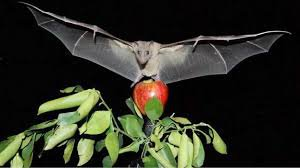

In [ ]:
from IPython.display import Image
img=Image(filename=r"/content/datasetbd/train/animals/bat/003bd60fa9.jpg")
img

In [ ]:
from tensorflow.keras.preprocessing  import image

path2=r"/content/datasetbd/train/animals/bat/003bd60fa9.jpg"

img = image.load_img(path2,target_size = (64,64))

In [ ]:
type(img)

PIL.Image.Image

In [ ]:
x = image.img_to_array(img)

In [ ]:
x.shape

(64, 64, 3)

In [ ]:
type(x)


numpy.ndarray

In [ ]:
x = np.expand_dims(x,axis = 0)
x.shape

(1, 64, 64, 3)

In [ ]:
# Exporting the model to json 
model_json = model.to_json()
with open("DigitalNaturalist.json", "w") as json_file:
    json_file.write(model_json)

# Exporting the model weights

model.save_weights("DigitalNaturalist")
print("Saved model to disk")

Saved model to disk
